In [1]:
from importlib import reload
from astropy import units as u
from astropy import constants as const
from astropy.modeling.models import BlackBody
from astropy.units.equivalencies import spectral

import numpy as np
import matplotlib.pyplot as plt

from src import astro530
from src import N_integrator

In [2]:
astro530 = reload(astro530)
N_integrator = reload(N_integrator)

In [3]:
Planck = astro530.Planck
BoxInt = N_integrator.BoxInt
funct_BoxInt = N_integrator.funct_BoxInt_unitless

funct_BoxInt(1e-16,1e3,n_size= 1e-6,scale='log', function=second_term).value

In [4]:
myplot_specs = {
    'font.size' : 20,              # Larger fonts for labels, axes
    'font.weight':'normal'
}

plt.rcParams.update(myplot_specs)

## 4) Emergent Intensity Integrator

### a) Integrate the quadratic and EB source function numerically
a) Illustrate your answer to Problem 2 (from last week) by numerically integrating the
radial emergent intensity (I+
ν (0, μ = 1)) from a quadratic source function. That is, use
plots (and perhaps tables) to show that the Eddington-Barbier approximation holds (i.e.
its prediction for the value of Sν (τν = 1) is valid) for a linear source function, and that
quadratic terms have the effects you derived in Problem 1.

b) Explain (and perhaps show) how you determined that your sampling and limits of
integration in part (a) were appropriate and how you determined your precision. (When
quantifying precision, what is the appropriate metric?)
Now that you have the code written, you may wish to convince yourself of the robustness
of the Eddington-Barbier approximation for other, perhaps more realistic functional forms
of Sν . The approximation is powerful because it makes no assumptions about LTE or
detailed physical processes.

$I^+_\nu(0,\mu)=\sum^\infty_{n=0}a_n\mu^n\int^\infty_0x^n e^{-x}dx = a_0\int^\infty_0e^{-x}dx + a_1\mu\int^\infty_0xe^{-x}dx+a_2\mu^2\int^\infty_0x^2e^{-x}dx$

In [5]:
def zero_term(x):
    return np.exp(-x)
def first_term(x):
    return x*np.exp(-x)
def second_term(x):
    return x**2*np.exp(-x)

In [6]:
n_size = 1e-6
xmin = 1e-10
xmax = 40

n_0 = funct_BoxInt(xmin,xmax,n_size = n_size, scale='log', function=zero_term)
n_1 = funct_BoxInt(xmin,xmax,n_size = n_size, scale='log', function=first_term)
n_2 = funct_BoxInt(xmin,xmax,n_size = n_size, scale='log', function=second_term)

print("Source function: S_v = a0 + a1 τ_v + a2 τ^2_v") 
print("Emergent Intensity: I+(0,mu) = a0",n_0,"+ a1 mu",n_1,"+ a2 mu^2",n_2)

Source function: S_v = a0 + a1 τ_v + a2 τ^2_v
Emergent Intensity: I+(0,mu) = a0 0.9999999999008847 + a1 mu 1.000000000000884 + a2 mu^2 2.000000000001761


At $\mu=1$, the emergent intensity is $I^+_\nu(0,\mu=1) \approx a_0 + a_1 + 2 a_2$.

Compare our numerical answer and the EB approximation where $I^+_\nu(0,\mu=1) \approx S(\tau_\nu = \mu = 1)$. Show how it directly relates to $a_2$.

In [7]:
a0 = np.array([1,2,3])
a1 = np.array([1,2,3])
a2 = np.linspace(-1,1,1000)

Ival = n_0 + n_1 + n_2

I0 = a0[0]*n_0 + a1[0]*n_1 + a2*n_2
S0= a0[0] + a1[0] + 1*a2

I1 = a0[1]*n_0 + a1[1]*n_1 + a2*n_2
S1= a0[1] + a1[1] + 1*a2

I2 = a0[2]*n_0 + a1[2]*n_1 + a2*n_2
S2= a0[2] + a1[2] + 1*a2

In [8]:
print("Relative Precision =",abs(4-Ival)/4)

Relative Precision = 2.41175968085372e-11


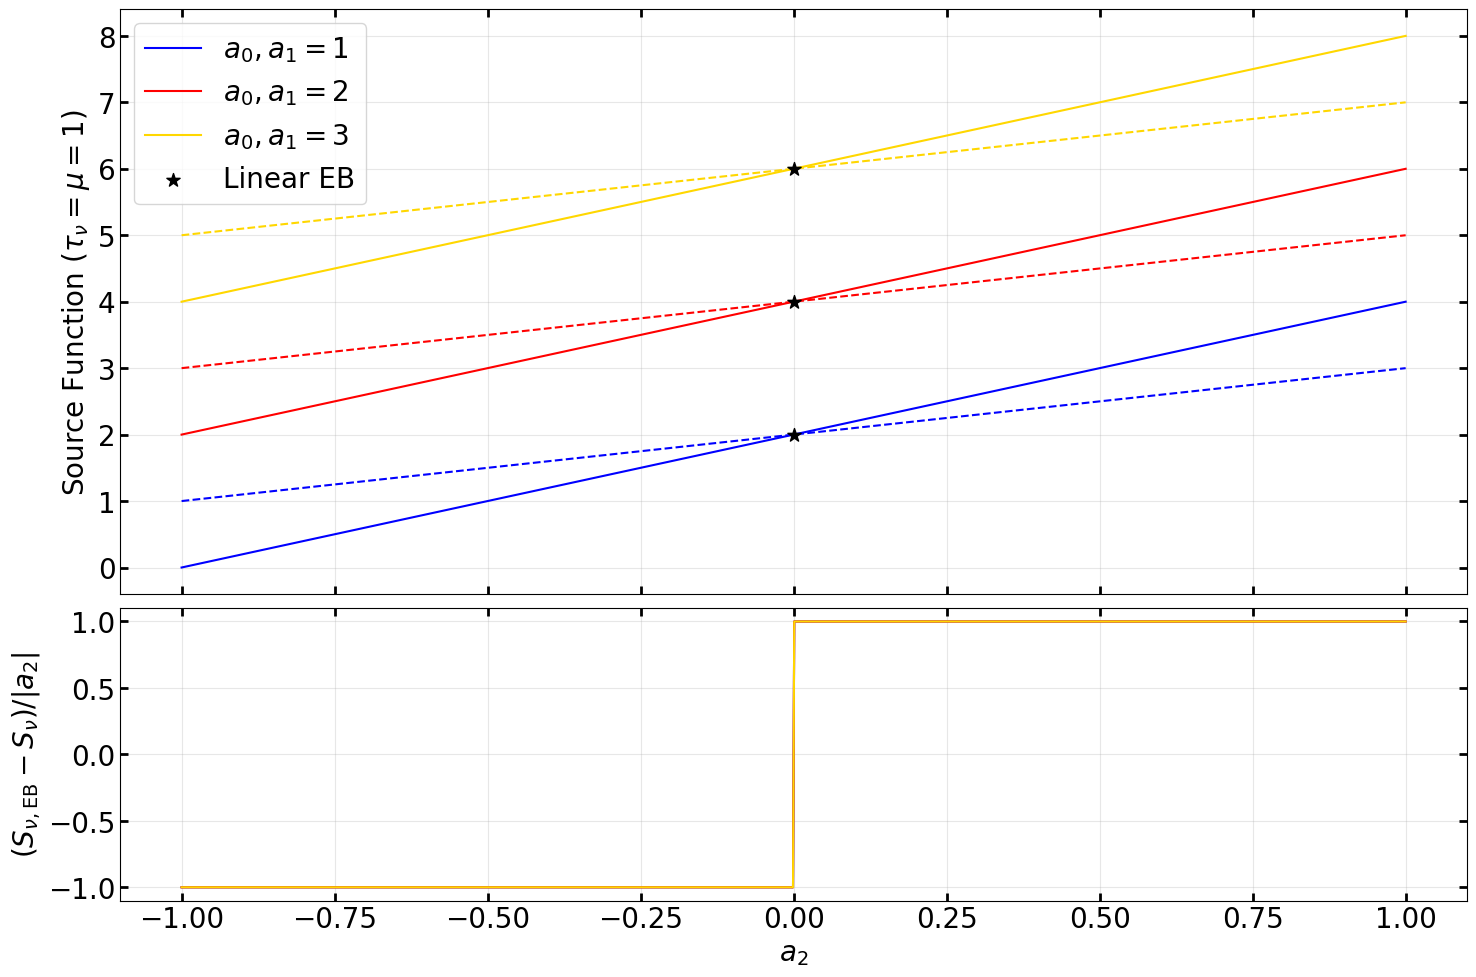

In [9]:
r0 = (I0 - S0)/abs(a2)
r1 = (I1 - S1)/abs(a2)
r2 = (I2 - S2)/abs(a2)

fig, (ax1,ax2) = plt.subplots(figsize = (15,10), nrows = 2, ncols = 1, 
                                    gridspec_kw={'height_ratios': [2, 1]}, squeeze = True, sharex = True)
fig.tight_layout(h_pad=-.5)

ax1.grid(True,alpha=.3)

ax1.plot(a2,I0,label = r"$a_0, a_1 = $"+str(a0[0]),c = 'b')
ax1.plot(a2,S0, c = 'b', ls = "--")

ax1.plot(a2,I1,label = r"$a_0, a_1 = $"+str(a0[1]),c = 'r')
ax1.plot(a2,S1, c = 'r', ls = "--")

ax1.plot(a2,I2,label = r"$a_0, a_1 = $"+str(a0[2]),c = 'gold')
ax1.plot(a2,S2, c = 'gold', ls = "--")

ax1.scatter([0,0,0],a0+a1,marker = "*",c='black',s=100,label = "Linear EB",zorder=4)

ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

ax1.tick_params(direction='in', axis='both',which='minor',length=3,width=1)#,labelsize=8)
ax1.tick_params(direction='in', axis='both',which='major',length=6,width=2)#,labelsize=8)

ax1.legend()

ax2.grid(True,alpha=.3)

ax2.plot(a2,r0, c = 'b')
ax2.plot(a2,r1, c = 'r')
ax2.plot(a2,r2, c = 'gold')

ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.tick_params(direction='in', axis='both',which='minor',length=3,width=1)#,labelsize=8)
ax2.tick_params(direction='in', axis='both',which='major',length=6,width=2)#,labelsize=8)

ax1.set_ylabel(r"Source Function ($\tau_\nu=\mu = 1$)")
ax2.set_xlabel(r"$a_2$")
ax2.set_ylabel(r"($S_{\nu,\mathrm{EB}}-S_\nu)/|a_2|$")

fig.savefig("plots/4a.pdf",bbox_inches='tight')

In [10]:
iterations = 20
tol = 1e-7

minlims = [1e-16,1]
maxlims = [10,400]
nlims = [10**-6,1e-3]

a0 = 1
a1 = 1
a2 = 1

sol = a0 + a1 + 2*a2

xmin_def = 1e-10
xmax_def = 50
n_def = 1e-5

xmins = np.geomspace(minlims[1],minlims[0],iterations)

xmaxs = np.geomspace(maxlims[0],maxlims[1],iterations)

n_vals = np.geomspace(nlims[0],nlims[1],iterations)

rel_prec = []

temp = []

for xmin in xmins:
    n_0 = funct_BoxInt(xmin,xmax_def,n_size = n_def, scale='log', function=zero_term)
    n_1 = funct_BoxInt(xmin,xmax_def,n_size = n_def, scale='log', function=first_term)
    n_2 = funct_BoxInt(xmin,xmax_def,n_size = n_def, scale='log', function=second_term)
    
    I0 = n_0*a0+n_1*a1+n_2*a2
    
    prec = abs(sol-I0)/I0
    temp.append(prec)
    
print("Done with xmins")
rel_prec.append(temp)
temp = []

for xmax in xmaxs:
    n_0 = funct_BoxInt(xmin_def,xmax,n_size = n_def, scale='log', function=zero_term)
    n_1 = funct_BoxInt(xmin_def,xmax,n_size = n_def, scale='log', function=first_term)
    n_2 = funct_BoxInt(xmin_def,xmax,n_size = n_def, scale='log', function=second_term)
    
    I0 = n_0*a0+n_1*a1+n_2*a2
    
    prec = abs(sol-I0)/I0
    temp.append(prec)

print("Done with xmaxs")
rel_prec.append(temp)
temp = []

k = 0
for n in n_vals:
    n_0 = funct_BoxInt(xmin_def,xmax_def,n_size = n, scale='log', function=zero_term)
    n_1 = funct_BoxInt(xmin_def,xmax_def,n_size = n, scale='log', function=first_term)
    n_2 = funct_BoxInt(xmin_def,xmax_def,n_size = n, scale='log', function=second_term)
    
    I0 = n_0*a0+n_1*a1+n_2*a2
    
    prec = abs(sol-I0)/I0
    temp.append(prec)
    k+=1
    
    if k%2 == 0:
        print("n_size complete:",int(100*k/iterations),"%")
print("Done with n density")
rel_prec.append(temp)
temp = []

Done with xmins
Done with xmaxs
n_size complete: 10 %
n_size complete: 20 %
n_size complete: 30 %
n_size complete: 40 %
n_size complete: 50 %
n_size complete: 60 %
n_size complete: 70 %
n_size complete: 80 %
n_size complete: 90 %
n_size complete: 100 %
Done with n density


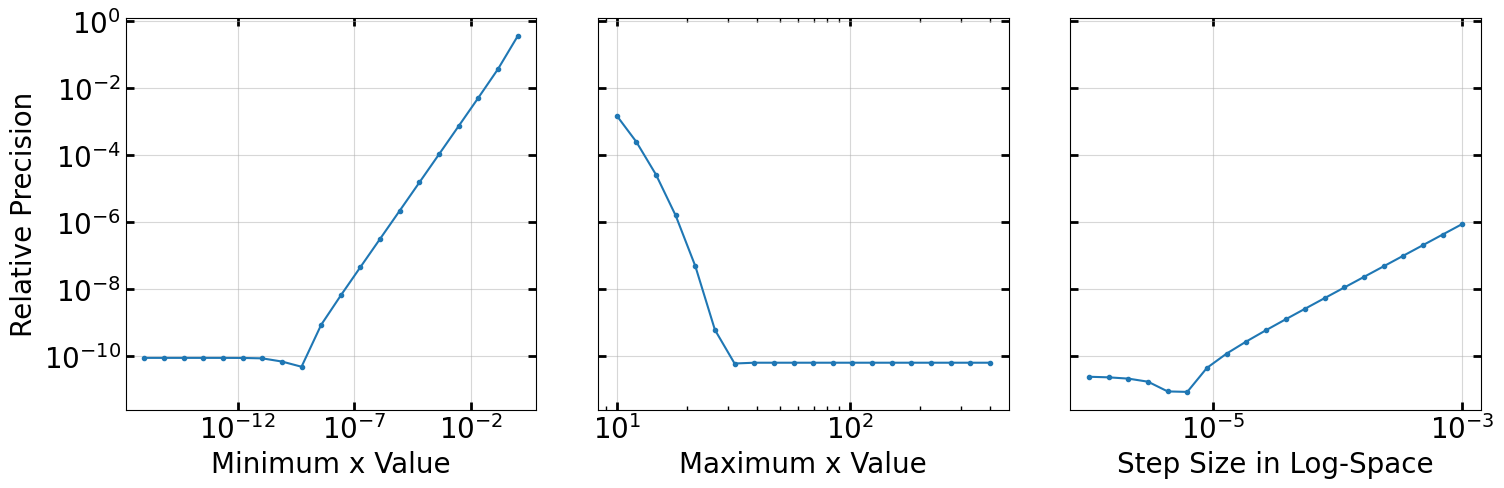

In [11]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize = (15,5), nrows = 1, ncols = 3,squeeze=True,sharey=True)

fig.tight_layout(w_pad=0)

ax1.minorticks_on()
ax1.grid(True,alpha=.5)

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

ax1.tick_params(direction='in', axis='both',which='minor',length=3,width=1)#,labelsize=8)
ax1.tick_params(direction='in', axis='both',which='major',length=6,width=2)#,labelsize=8)

ax1.set_ylabel("Relative Precision")
ax1.set_xlabel("Minimum x Value")


ax2.minorticks_on()
ax2.grid(True,alpha=.5)

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')

ax2.tick_params(direction='in', axis='both',which='minor',length=3,width=1)#,labelsize=8)
ax2.tick_params(direction='in', axis='both',which='major',length=6,width=2)#,labelsize=8)

ax2.set_xlabel("Maximum x Value")


ax3.minorticks_on()
ax3.grid(True,alpha=.5)

ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.yaxis.set_ticks_position('both')
ax3.xaxis.set_ticks_position('both')

ax3.tick_params(direction='in', axis='both',which='minor',length=3,width=1)#,labelsize=8)
ax3.tick_params(direction='in', axis='both',which='major',length=6,width=2)#,labelsize=8)

ax3.set_xlabel("Step Size in Log-Space")

ax1.plot(xmins,rel_prec[0],label="a0,a1,a2 = 1",marker=".")
ax2.plot(xmaxs,rel_prec[1],marker=".")
ax3.plot(n_vals,rel_prec[2],marker=".")

#ax1.legend()
fig.savefig("plots/4b.pdf",bbox_inches='tight')

## 5) Exponential Integrals
In order to evaluate moments of the intensity field for an arbitrary, positive, isotropic
source function in a plane-parallel atmosphere, we can perform numerical integrals over
the product of the source function with various exponential integrals.
In practice, a computationally faster (but more complex to code) method to solve the
radiative transfer equations involves Gaussian-quadrature in both depth and angle (de-
scribed in Rutten Chapter 5, which is all about how to do this problem the “right” way —
that is, the hard-to-code but computationally-efficent-and-robust way). We will do this
simple integration instead because it is closer to the simple analytic formulae and today’s
computers can use “brute force” to solve the simple problem we are working towards.
You may use black-box integrators here but I strongly recommend having a way to check
their accuracy even for functions that do not have analytic solutions.

(a) Write or familiarize yourself with Python’s scipy.special.expn or the equivalent
exponential integral functions in whatever language you are using.

#### $E_n(x)=x^{n-1}\int^\infty_x\frac{e^{-t}}{t^n}dt$

(b) Numerically integrate the area under the first three exponential functions (that is,
numerically integrate 

$\int^\infty_0 E_n(x)dx$

for n = 1, 2, 3). How close can you get to the analytic result? What limits your precision?

(c) Explain how you determined that your sampling and upper limit in part (b) are appro-
priate and how you determined the precision of your integration. For a box or trapezoid
integrator, you may need to experiment with appropriate samplings and limits to achieve
an precise result. What’s the best precision you can get in a reasonable computation time
(less than a second)? What upper limit and spacing of points gives you that precision?
How few points can you get away with, practically speaking? (If you use a black-box
integrator, describe how it does these things and how you know it’s working.)

In [12]:
from scipy.special import expn

$E_n(x) \rightarrow x^{n-1} \Gamma(1-n,x)$

In [13]:
intEn = [0,0,0]
for i in range(3): intEn[i] = 1/(1+i) 

In [14]:
intEn

[1.0, 0.5, 0.3333333333333333]

### b)

In [15]:
def exp1(x): 
    return expn(1,x)
def exp2(x): 
    return expn(2,x)
def exp3(x): 
    return expn(3,x)

In [16]:
#funct_BoxInt(.000001,1000,n_den=10000,function=exp2)

In [17]:
n_val = np.logspace(0,3,4)
#n_val = [10**3,10**6]
#int_B = []
error_n = []

xmin = 1e-8
xmax = 1e3

for n in n_val:
    temp = []
    NintE = [funct_BoxInt(xmin,xmax,n_den=n,function=exp1),funct_BoxInt(xmin,xmax,n_den=n,function=exp2),funct_BoxInt(xmin,xmax,n_den=n,function=exp3)]
    for i in range(3):
        temp.append(abs(NintE[i]-intEn[i])/intEn[i])
    error_n.append(temp)
    
error_n = np.array(error_n).T

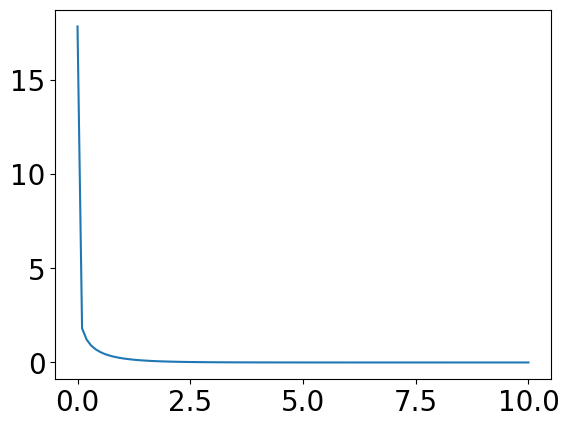

In [18]:
x = np.linspace(1e-8,10,100)
#plt.xscale("log")
plt.plot(x,exp1(x))

In [19]:
iterations = 20

minlims = [1e-16,1e-7]
maxlims = [2,1e2]
nlims = [1e-3,1e-1]

a0 = 1
a1 = 1
a2 = 1

xmin_def = 1e-14
xmax_def = 30
n_def = 1e-3

xmins = np.geomspace(minlims[0],minlims[1],iterations)

xmaxs = np.geomspace(maxlims[0],maxlims[1],iterations)

n_vals = np.geomspace(nlims[0],nlims[1],iterations)

rel_prec5 = []

temp = []

for xmin in xmins:
    temp2 = []
    NintE = [funct_BoxInt(xmin,xmax_def,n_size=n_def,scale="log",function=exp1),
             funct_BoxInt(xmin,xmax_def,n_size=n_def,scale="log",function=exp2),
             funct_BoxInt(xmin,xmax_def,n_size=n_def,scale="log",function=exp3)]
    for i in range(3):
        prec = abs(intEn[i]-NintE[i])/intEn[i]
        temp2.append(prec)
    temp.append(temp2)
print("Done with xmins")

temp = np.array(temp).T.tolist()
rel_prec5.append(temp)

temp = []

for xmax in xmaxs:
    temp2 = []
    NintE = [funct_BoxInt(xmin_def,xmax,n_size=n_def,scale="log",function=exp1),
             funct_BoxInt(xmin_def,xmax,n_size=n_def,scale="log",function=exp2),
             funct_BoxInt(xmin_def,xmax,n_size=n_def,scale="log",function=exp3)]
    for i in range(3):
        prec = abs(intEn[i]-NintE[i])/intEn[i]
        temp2.append(prec)
    temp.append(temp2)
print("Done with xmaxs")

temp = np.array(temp).T.tolist()
rel_prec5.append(temp)

temp = []

k=0
for n in n_vals:
    temp2 = []
    NintE = [funct_BoxInt(xmin_def,xmax_def,n_size=n,scale="log",function=exp1),
             funct_BoxInt(xmin_def,xmax_def,n_size=n,scale="log",function=exp2),
             funct_BoxInt(xmin_def,xmax_def,n_size=n,scale="log",function=exp3)]
    for i in range(3):
        prec = abs(intEn[i]-NintE[i])/intEn[i]
        temp2.append(prec)
    temp.append(temp2)
    
    k+=1
    
    if k%2 == 0:
        print("n_size complete:",int(100*k/iterations),"%")
print("Done with n density")

temp = np.array(temp).T.tolist()
rel_prec5.append(temp)

temp = []

Done with xmins
Done with xmaxs
n_size complete: 10 %
n_size complete: 20 %
n_size complete: 30 %
n_size complete: 40 %
n_size complete: 50 %
n_size complete: 60 %
n_size complete: 70 %
n_size complete: 80 %
n_size complete: 90 %
n_size complete: 100 %
Done with n density


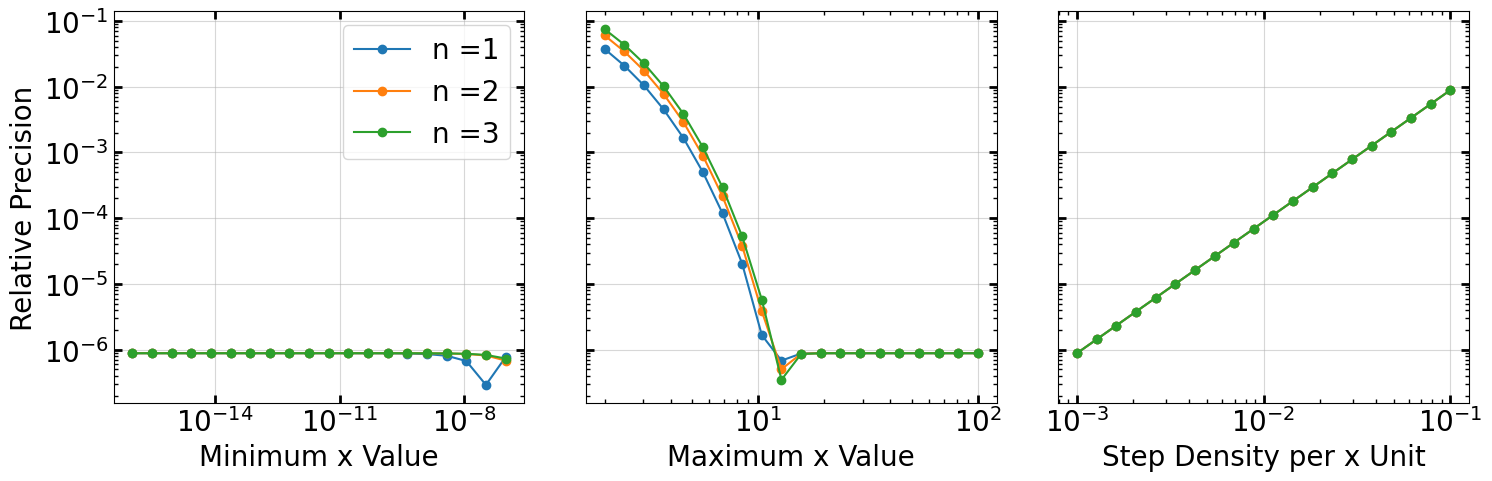

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (15,5), nrows = 1, ncols = 3,squeeze=True,sharey=True)

fig.tight_layout(w_pad=0)

ax1.minorticks_on()
ax1.grid(True,alpha=.5)

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

ax1.tick_params(direction='in', axis='both',which='minor',length=3,width=1)#,labelsize=8)
ax1.tick_params(direction='in', axis='both',which='major',length=6,width=2)#,labelsize=8)

ax1.set_ylabel("Relative Precision")
ax1.set_xlabel("Minimum x Value")

ax2.minorticks_on()
ax2.grid(True,alpha=.5)

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')

ax2.tick_params(direction='in', axis='both',which='minor',length=3,width=1)#,labelsize=8)
ax2.tick_params(direction='in', axis='both',which='major',length=6,width=2)#,labelsize=8)

ax2.set_xlabel("Maximum x Value")


ax3.minorticks_on()
ax3.grid(True,alpha=.5)

ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.yaxis.set_ticks_position('both')
ax3.xaxis.set_ticks_position('both')

ax3.tick_params(direction='in', axis='both',which='minor',length=3,width=1)#,labelsize=8)
ax3.tick_params(direction='in', axis='both',which='major',length=6,width=2)#,labelsize=8)

ax3.set_xlabel("Step Density per x Unit")

for i in range(3):
    ax1.plot(xmins,rel_prec5[0][i],label="n ="+str(i+1),marker="o")
    ax2.plot(xmaxs,rel_prec5[1][i],marker="o")
    ax3.plot(n_vals,rel_prec5[2][i],marker="o")

ax1.legend()
    
fig.savefig("plots/5b.pdf",bbox_inches='tight')

In [21]:
from scipy.integrate import simpson
linear_func = N_integrator.linear_func

In [22]:
def simpson_wrapper(xmin, xmax, n_size = 1e-2, n_den = None, scale = "linear", function = linear_func, **kwargs):
    if xmax < xmin:
        raise ValueError("xmax must be greater than xmin.")
    elif xmax == xmin: 
        return 0.
    
    if n_den == None or n_den <= 0:
        n = int((xmax - xmin)/n_size)
    else:
        n = int((xmax - xmin)*n_den)
        
    if scale == "linear":
        x_arr = np.linspace(xmin, xmax, n)
    elif scale == "log":
        x_arr = np.float_power(10,np.arange(np.log10(xmin),np.log10(xmax),n_size))
        
    else:
        raise ValueError("scale must equal either 'linear' or 'log'")
        
    y_list = function(x_arr,**kwargs)
    
    return simpson(y_list, x = x_arr)

In [23]:
abs(1-simpson_wrapper(1e-12,1e2,n_size=1e-7,scale="log",function=exp1))

2.8054336631555543e-11

In [24]:
iterations = 20

minlims = [1e-18,1e-7]
maxlims = [2,1e2]
nlims = [1e-6,1e-1]

xmin_def = 1e-16
xmax_def = 1e2
n_def = 1e-5

xmins = np.geomspace(minlims[0],minlims[1],iterations)

xmaxs = np.geomspace(maxlims[0],maxlims[1],iterations)

n_vals = np.geomspace(nlims[0],nlims[1],iterations)

rel_prec5 = []

temp = []

for xmin in xmins:
    temp2 = []
    NintE = [simpson_wrapper(xmin,xmax_def,n_size=n_def,scale="log",function=exp1),
             simpson_wrapper(xmin,xmax_def,n_size=n_def,scale="log",function=exp2),
             simpson_wrapper(xmin,xmax_def,n_size=n_def,scale="log",function=exp3)]
    for i in range(3):
        prec = abs(intEn[i]-NintE[i])/intEn[i]
        temp2.append(prec)
    temp.append(temp2)
print("Done with xmins")

temp = np.array(temp).T.tolist()
rel_prec5.append(temp)

temp = []

for xmax in xmaxs:
    temp2 = []
    NintE = [simpson_wrapper(xmin_def,xmax,n_size=n_def,scale="log",function=exp1),
             simpson_wrapper(xmin_def,xmax,n_size=n_def,scale="log",function=exp2),
             simpson_wrapper(xmin_def,xmax,n_size=n_def,scale="log",function=exp3)]
    for i in range(3):
        prec = abs(intEn[i]-NintE[i])/intEn[i]
        temp2.append(prec)
    temp.append(temp2)
print("Done with xmaxs")

temp = np.array(temp).T.tolist()
rel_prec5.append(temp)

temp = []

k=0
for n in n_vals:
    temp2 = []
    NintE = [simpson_wrapper(xmin_def,xmax_def,n_size=n,scale="log",function=exp1),
             simpson_wrapper(xmin_def,xmax_def,n_size=n,scale="log",function=exp2),
             simpson_wrapper(xmin_def,xmax_def,n_size=n,scale="log",function=exp3)]
    for i in range(3):
        prec = abs(intEn[i]-NintE[i])/intEn[i]
        temp2.append(prec)
    temp.append(temp2)
    
    k+=1
    
    if k%2 == 0:
        print("n_size complete:",int(100*k/iterations),"%")
print("Done with n density")

temp = np.array(temp).T.tolist()
rel_prec5.append(temp)

temp = []

Done with xmins
Done with xmaxs
n_size complete: 10 %
n_size complete: 20 %
n_size complete: 30 %
n_size complete: 40 %
n_size complete: 50 %
n_size complete: 60 %
n_size complete: 70 %
n_size complete: 80 %
n_size complete: 90 %
n_size complete: 100 %
Done with n density


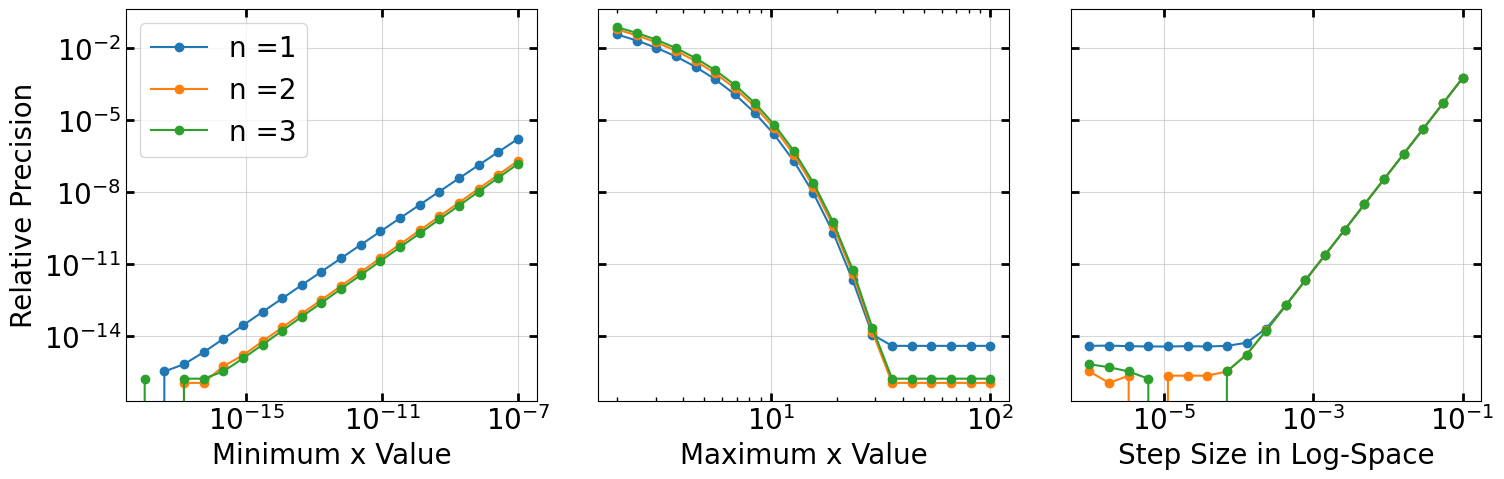

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (15,5), nrows = 1, ncols = 3,squeeze=True,sharey=True)

fig.tight_layout(w_pad=0)

ax1.minorticks_on()
ax1.grid(True,alpha=.5)

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

ax1.tick_params(direction='in', axis='both',which='minor',length=3,width=1)#,labelsize=8)
ax1.tick_params(direction='in', axis='both',which='major',length=6,width=2)#,labelsize=8)

ax1.set_ylabel("Relative Precision")
ax1.set_xlabel("Minimum x Value")

ax2.minorticks_on()
ax2.grid(True,alpha=.5)

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')

ax2.tick_params(direction='in', axis='both',which='minor',length=3,width=1)#,labelsize=8)
ax2.tick_params(direction='in', axis='both',which='major',length=6,width=2)#,labelsize=8)

ax2.set_xlabel("Maximum x Value")


ax3.minorticks_on()
ax3.grid(True,alpha=.5)

ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.yaxis.set_ticks_position('both')
ax3.xaxis.set_ticks_position('both')

ax3.tick_params(direction='in', axis='both',which='minor',length=3,width=1)#,labelsize=8)
ax3.tick_params(direction='in', axis='both',which='major',length=6,width=2)#,labelsize=8)

ax3.set_xlabel("Step Size in Log-Space")

for i in range(3):
    ax1.plot(xmins,rel_prec5[0][i],label="n ="+str(i+1),marker="o")
    ax2.plot(xmaxs,rel_prec5[1][i],marker="o")
    ax3.plot(n_vals,rel_prec5[2][i],marker="o")

ax1.legend()
    
fig.savefig("plots/5b.pdf",bbox_inches='tight')